In [7]:
import numpy as np
from scipy.sparse import csr_matrix
from paralleltomo import paralleltomo
from PIL import Image
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.ndimage import zoom

# Defining image

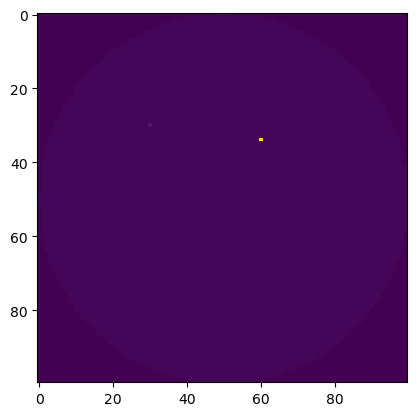

In [26]:
path = "/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/testImage.npy"
im = np.load(path)
im = im[::50,::50]
plt.imshow(im)
plt.show()

## Now defining A from paralleltomo

In [6]:
N = 50
p = 175
theta = np.matrix(np.linspace(0,179,90))
[A,theta,p,d] = paralleltomo(N, theta, p)

/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a
/Users/ninapeuker/Desktop/General_Engineering/6th semester 2023/02526 Mathematical Modeling/02526 Code/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: invalid value encountered in true_divide
  tx = (x - x0theta[j,0])/a


### Calculate matrix b

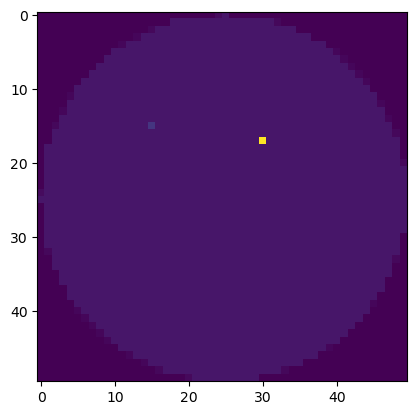

In [28]:
def calculatingB(A, resized_im):
    x = np.ravel(resized_im)
    b = np.matmul(A,x)
    return b

resized_im = zoom(im, (0.5,0.5), order=1) # Using Bilinear Interpolation
b = calculatingB(A, resized_im)

plt.imshow(resized_im)
plt.show()


### Adding Gaussian Noise
Error rates:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6540865/ 

max 0.05982594161885374
min 0.0


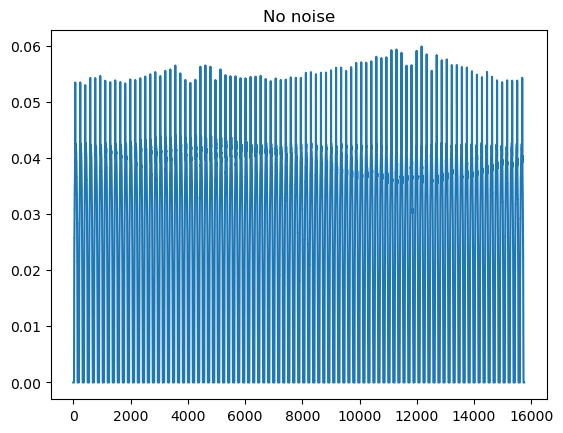

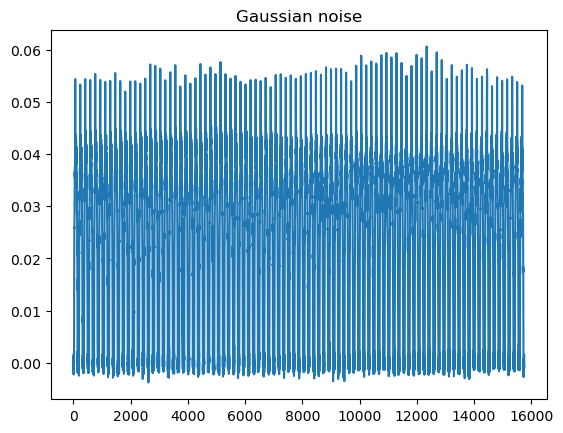

/var/folders/yg/6b_092sj6sg62kw39ck_3pd00000gn/T/ipykernel_4846/525870983.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  gaussian_x = np.linalg.lstsq(A, gaussian_b)[0]


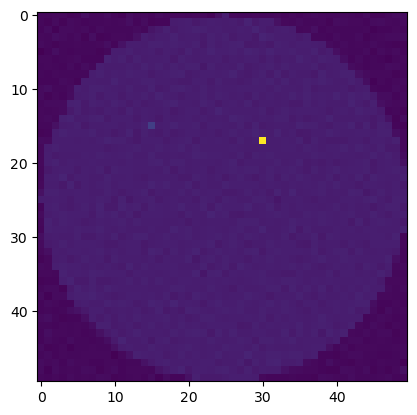

In [29]:
# adding noise from mean and stanard deviation
def addNoise(b,lower_bound = 0.2,upper_bound = 0.3):
    std = np.sqrt(np.mean(b)*(1-np.random.uniform(lower_bound, upper_bound))/(len(b)-1))
    noise = np.random.normal(0, std, b.shape)
    noisy_b = b + noise
    return noisy_b

plt.plot([i for i in range(len(b))], b)
plt.title("No noise")
print("max", (max(b)))
print("min", (min(b)))
plt.show()

gaussian_b = addNoise(b)

plt.plot([i for i in range(len(b))], gaussian_b)
plt.title("Gaussian noise")
plt.show()

gaussian_x = np.linalg.lstsq(A, gaussian_b)[0]
gaussian_resized = np.resize(gaussian_x, (50,50))

plt.imshow(gaussian_resized)
plt.show()


### Add poisson noise

In [15]:
attenuation_wood = 4.2848231320000005
attenuation_steel = 395.44319
attenuation_lead = 130.6

def add_poisson_noise(b):
    # convert the image to float and scale the intensity values between 0 and 1
    image = image.astype(np.float32)
    image /= attenuation_steel

    # generate Poisson noise with the same shape as the image
    noise = poisson.rvs(np.clip(image * 255, 0, 255)) / 255.0

    # add the noise to the image
    noisy_image = np.clip(image + noise, 0, 1)

    # scale the intensity values back to their original range
    noisy_image *= attenuation_wood

    # convert the image back to the original data type
    noisy_image = noisy_image.astype(image.dtype)

    return noisy_image

poisson_x = add_poisson_noise(x)

plt.imshow(poisson_b)
plt.show()

(50, 50) (8950, 2500)


LinAlgError: Incompatible dimensions